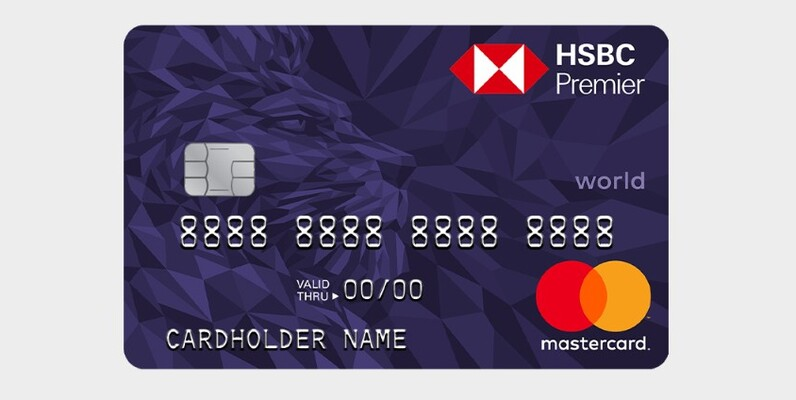

# **Project Tutorial: Credit_Risk_Customer Analysis**

**This tutorial focuses on the data cleaning and analysis of customer risk Potential for receiving credit**

## II. **Dataset Description**: 

**The dataset consists of 20 features of the customers. It helps to classify customers described by the set of attributes as _good_ or _bad credit_ risks** [Datasource](https://www.kaggle.com/datasets/ppb00x/credit-risk-customers/data)

## **1. Loading the Dependencies**

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
print("All libraries loaded successfully")

All libraries loaded successfully


## **2. Loading Dataset**

In [365]:
credit_risk = pd.read_csv("credit_customers.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * **Head or First 5 rows of data**
 * **Size of dataset: shape**
 * **Data columns**
 * **Data types and the number of these categorical: Nominal and Ordinal data types:**
 * **Information about dataset**
 * **Statistical description of dataset**
 * **Checking for NaN or missing values and sort in ascending order for clarity**

### **i. Head or First 5 rows of data**

In [366]:
credit_risk.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


### **ii. Size of Dataset: Shape**

In [367]:
credit_risk.shape

(1000, 21)

#### **Observation**: **The dataset has _1000 feature rows and 21 feature columns_ or attributes**

### **iii. Data Columns**

In [368]:
credit_risk.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

### **iv. Data Types and the Number of These Categorical: Nominal and Ordinal Data Types:**

In [369]:
credit_risk.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [370]:
categ_object = credit_risk.select_dtypes(include = ["object"]).columns.to_list()

In [371]:
categ_num = credit_risk.select_dtypes(include = ["float"]).columns.to_list()

In [372]:
categ_object # Data of object data type

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [373]:
len(categ_object) # Len of object data type is 14

14

In [374]:
categ_num 

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [375]:
len(categ_num)

7

#### **_Observation_**: **We have a total of _21 feature columns_ of which _14 are object data type_ and _7 are float data type_**

### **v. Information About Dataset**

In [376]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

#### **Observation**: **Each feature column has exactly 1000 rows and hence no missing values in the dataset**

### **vi. Statistical description of Dataset**

In [377]:
credit_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

* **Deleting redundant columns.**
* **Renaming the columns.**
* **Dropping duplicates.**
* **Cleaning individual columns.**
* **Remove the NaN values from the dataset**
* **Check for some more Transformations**

### **i. Deleting redundant columns**.

In [378]:
credit_risk.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [379]:
credit_risk.drop(columns = ['checking_status', 'duration','credit_history', 'purpose', 'employment', 'installment_commitment', 
                            'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'other_payment_plans',
                            'num_dependents','savings_status'], axis = 1, inplace=  True)

In [380]:
credit_risk.head(5)

,credit_amount,age,housing,existing_credits,job,own_telephone,foreign_worker,class
0,1169.0,67.0,own,2.0,skilled,yes,yes,good
1,5951.0,22.0,own,1.0,skilled,none,yes,bad
2,2096.0,49.0,own,1.0,unskilled resident,none,yes,good
3,7882.0,45.0,for free,1.0,skilled,none,yes,good
4,4870.0,53.0,for free,2.0,skilled,none,yes,bad


In [381]:
credit_risk.shape # Final shape of dataset

(1000, 8)

### **ii. Renaming the columns**.

In [382]:
credit_risk.columns

Index(['credit_amount', 'age', 'housing', 'existing_credits', 'job',
       'own_telephone', 'foreign_worker', 'class'],
      dtype='object')

In [383]:
credit_risk.rename({"credit_amount":"Credit_Amount", "savings_status":"Saving_Status", "age":"Age", "housing":"Housing", "existing_credits": 
                    "Exiting_Credit", "job": "Job", "own_telephone":"Own_Telephone", "foreign_worker": "Foreign_Worker", "class": "Class"}, inplace = True,
                   axis = 1)

In [384]:
credit_risk.head(5)

,Credit_Amount,Age,Housing,Exiting_Credit,Job,Own_Telephone,Foreign_Worker,Class
0,1169.0,67.0,own,2.0,skilled,yes,yes,good
1,5951.0,22.0,own,1.0,skilled,none,yes,bad
2,2096.0,49.0,own,1.0,unskilled resident,none,yes,good
3,7882.0,45.0,for free,1.0,skilled,none,yes,good
4,4870.0,53.0,for free,2.0,skilled,none,yes,bad


### **iii. Dropping Duplicates.**

In [385]:
credit_risk.duplicated(keep ="first").value_counts()

False    1000
Name: count, dtype: int64

### **iv. Cleaning individual columns:**

In [386]:
credit_risk.columns

Index(['Credit_Amount', 'Age', 'Housing', 'Exiting_Credit', 'Job',
       'Own_Telephone', 'Foreign_Worker', 'Class'],
      dtype='object')

In [387]:
credit_risk["Housing"].value_counts()

Housing
own         713
rent        179
for free    108
Name: count, dtype: int64

In [388]:
label_encoder = LabelEncoder()

In [389]:
credit_risk["Housing"] = label_encoder.fit_transform(credit_risk["Housing"])

In [390]:
credit_risk.head(5)

,Credit_Amount,Age,Housing,Exiting_Credit,Job,Own_Telephone,Foreign_Worker,Class
0,1169.0,67.0,1,2.0,skilled,yes,yes,good
1,5951.0,22.0,1,1.0,skilled,none,yes,bad
2,2096.0,49.0,1,1.0,unskilled resident,none,yes,good
3,7882.0,45.0,0,1.0,skilled,none,yes,good
4,4870.0,53.0,0,2.0,skilled,none,yes,bad


In [391]:
credit_risk["Housing"].value_counts()

Housing
1    713
2    179
0    108
Name: count, dtype: int64

#### **Note: Own ---> 1, rent ---> 2 and for free ---> 0**

In [392]:
credit_risk["Job"].value_counts().sort_values()

Job
unemp/unskilled non res       22
high qualif/self emp/mgmt    148
unskilled resident           200
skilled                      630
Name: count, dtype: int64

In [393]:
# Initialiazing OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown  = 'ignore', sparse_output = False)

In [394]:
credit_risk["Job"] = one_hot_encoder.fit_transform(credit_risk[["Job"]]) # Always expects a two dimensional container

In [395]:
credit_risk.head(3)

,Credit_Amount,Age,Housing,Exiting_Credit,Job,Own_Telephone,Foreign_Worker,Class
0,1169.0,67.0,1,2.0,0.0,yes,yes,good
1,5951.0,22.0,1,1.0,0.0,none,yes,bad
2,2096.0,49.0,1,1.0,0.0,none,yes,good


In [396]:
# Categories leanrned by encoder:
print(one_hot_encoder.categories_)

[array(['high qualif/self emp/mgmt', 'skilled', 'unemp/unskilled non res',
       'unskilled resident'], dtype=object)]


In [397]:
# features transformed by One-Hot Encoder:
credit_risk["Job"].value_counts()

Job
0.0    852
1.0    148
Name: count, dtype: int64

In [398]:
credit_risk["Own_Telephone"].value_counts()

Own_Telephone
none    596
yes     404
Name: count, dtype: int64

In [399]:
credit_risk["Own_Telephone"] = credit_risk["Own_Telephone"].apply(lambda x: 0 if x =="none" else 1)

#### **Note: none ---> 0 and yes ---> 1**

In [400]:
credit_risk.head(3)

,Credit_Amount,Age,Housing,Exiting_Credit,Job,Own_Telephone,Foreign_Worker,Class
0,1169.0,67.0,1,2.0,0.0,1,yes,good
1,5951.0,22.0,1,1.0,0.0,0,yes,bad
2,2096.0,49.0,1,1.0,0.0,0,yes,good


In [401]:
credit_risk["Foreign_Worker"].value_counts()

Foreign_Worker
yes    963
no      37
Name: count, dtype: int64

In [402]:
credit_risk["Foreign_Worker"] = credit_risk["Foreign_Worker"].apply(lambda x: 1 if x =="yes" else 0)

#### **Note: yes ---> 1 and no ---> 0**

In [403]:
credit_risk.head(3)

,Credit_Amount,Age,Housing,Exiting_Credit,Job,Own_Telephone,Foreign_Worker,Class
0,1169.0,67.0,1,2.0,0.0,1,1,good
1,5951.0,22.0,1,1.0,0.0,0,1,bad
2,2096.0,49.0,1,1.0,0.0,0,1,good


In [404]:
credit_risk["Class"].value_counts()

Class
good    700
bad     300
Name: count, dtype: int64

In [405]:
credit_risk["Class"].unique()

array(['good', 'bad'], dtype=object)

#### **Assigning binary labels to the Target: Class feature column**

In [406]:
credit_risk["Class"] = credit_risk["Class"].apply(lambda x: 1 if x =="good" else 0)

#### **Note: good----> 1 and bad-----0**

In [407]:
credit_risk.head(5)

,Credit_Amount,Age,Housing,Exiting_Credit,Job,Own_Telephone,Foreign_Worker,Class
0,1169.0,67.0,1,2.0,0.0,1,1,1
1,5951.0,22.0,1,1.0,0.0,0,1,0
2,2096.0,49.0,1,1.0,0.0,0,1,1
3,7882.0,45.0,0,1.0,0.0,0,1,1
4,4870.0,53.0,0,2.0,0.0,0,1,0


In [408]:
credit_risk["Age"].dtype

dtype('float64')

### **Changing Age to Int data type**

In [409]:
credit_risk["Age"] = credit_risk["Age"].astype(int)

In [410]:
credit_risk.dtypes

Credit_Amount     float64
Age                 int32
Housing             int32
Exiting_Credit    float64
Job               float64
Own_Telephone       int64
Foreign_Worker      int64
Class               int64
dtype: object

#### **Renaming Own_Telephone, Foreign_Worker and Class to boolean**

In [411]:
credit_risk = credit_risk.astype({"Own_Telephone":"bool", "Foreign_Worker":"bool", "Class":"bool"})

In [412]:
credit_risk.dtypes

Credit_Amount     float64
Age                 int32
Housing             int32
Exiting_Credit    float64
Job               float64
Own_Telephone        bool
Foreign_Worker       bool
Class                bool
dtype: object

In [413]:
credit_risk.head(5)

,Credit_Amount,Age,Housing,Exiting_Credit,Job,Own_Telephone,Foreign_Worker,Class
0,1169.0,67,1,2.0,0.0,True,True,True
1,5951.0,22,1,1.0,0.0,False,True,False
2,2096.0,49,1,1.0,0.0,False,True,True
3,7882.0,45,0,1.0,0.0,False,True,True
4,4870.0,53,0,2.0,0.0,False,True,False


#### Transforming Booleans to 1's and 0's

In [414]:
def scale_true_false_columns(df):

    # Identify True/False columns
    true_false_cols = df.select_dtypes(include=['bool']).columns

    # Create a MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the True/False columns
    df[true_false_cols] = scaler.fit_transform(df[true_false_cols])

    return df  # Return the dataframe with scaled True/False columns

In [415]:
credit_risk = scale_true_false_columns(credit_risk)

In [416]:
credit_risk.head(5)

,Credit_Amount,Age,Housing,Exiting_Credit,Job,Own_Telephone,Foreign_Worker,Class
0,1169.0,67,1,2.0,0.0,1.0,1.0,1.0
1,5951.0,22,1,1.0,0.0,0.0,1.0,0.0
2,2096.0,49,1,1.0,0.0,0.0,1.0,1.0
3,7882.0,45,0,1.0,0.0,0.0,1.0,1.0
4,4870.0,53,0,2.0,0.0,0.0,1.0,0.0


#### **Exporting Cleaned Data to csv file finally**

In [417]:
credit_risk.to_csv("Cleaned_credit_risk.csv", index = False)

In [418]:
cleaned_credit_risk = pd.read_csv("Cleaned_credit_risk.csv")

In [420]:
cleaned_credit_risk.head(5)

,Credit_Amount,Age,Housing,Exiting_Credit,Job,Own_Telephone,Foreign_Worker,Class
0,1169.0,67,1,2.0,0.0,1.0,1.0,1.0
1,5951.0,22,1,1.0,0.0,0.0,1.0,0.0
2,2096.0,49,1,1.0,0.0,0.0,1.0,1.0
3,7882.0,45,0,1.0,0.0,0.0,1.0,1.0
4,4870.0,53,0,2.0,0.0,0.0,1.0,0.0
